In [1]:
%cd "../fiberphotopy"

C:\Users\mceau\Documents\fiberphotopy\fiberphotopy


In [18]:
import fiber_data
import behavioral_data
import fp_utils
import analysis
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def rel():
    for i in [fp_utils,analysis,fiber_data,behavioral_data]:
        importlib.reload(i)
rel()

In [3]:
vgbz = analysis.MultiSession('../../DATA/j42')


Importing folder vgb11...
Importing ../../DATA/j42/vgb11/bsa_rec1_rat11_30032022c20_01.dat...
Importing of ../../DATA/j42/vgb11/bsa_rec1_rat11_30032022c20_01.dat finished in 0.10936951637268066 seconds
Analyzing peaks...


C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\mceau\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Importing of ../../DATA/j42/vgb11/AS21RSAxbaselineRat11_30032022_0.csv finished in 3.431001663208008 seconds

Importing folder vgb12...
Importing ../../DATA/j42/vgb12/bsa_rec3_rat12_30032022c20_01.dat...
Importing of ../../DATA/j42/vgb12/bsa_rec3_rat12_30032022c20_01.dat finished in 0.02569723129272461 seconds
Analyzing peaks...
Importing of ../../DATA/j42/vgb12/AS21RSAxbaseline_Rat12_30032022_0.csv finished in 3.305600881576538 seconds

Importing folder vgb5...
Importing ../../DATA/j42/vgb5/bsa_rec2_rat5_30032022c20_01.dat...
Importing of ../../DATA/j42/vgb5/bsa_rec2_rat5_30032022c20_01.dat finished in 0.03125119209289551 seconds
Analyzing peaks...
Importing of ../../DATA/j42/vgb5/AS21RSAxbaselineRat5_30032022_0.csv finished in 3.3979787826538086 seconds
Importing ../../DATA/j42\vgb11\bsa_rec1_rat11_30032022c20_01.dat...
Importing of ../../DATA/j42\vgb11\bsa_rec1_rat11_30032022c20_01.dat finished in 0.10937857627868652 seconds
Importing ../../DATA/j42\vgb12\bsa_rec3_rat12_30032022c20_

# BEHAVIOR

## SUMMARY

### VGB 11

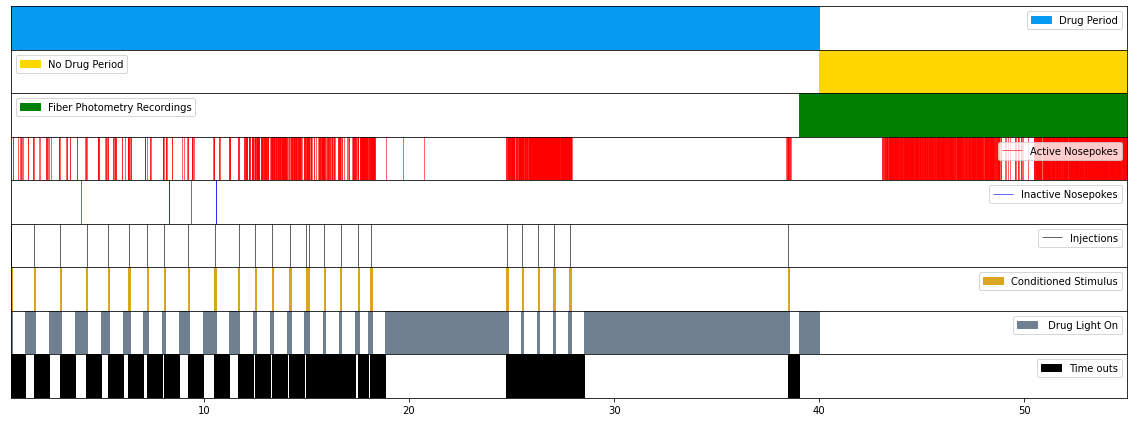

In [4]:
vgbz.rat_sessions['vgb11'].behavior.summary()

### VGB 5

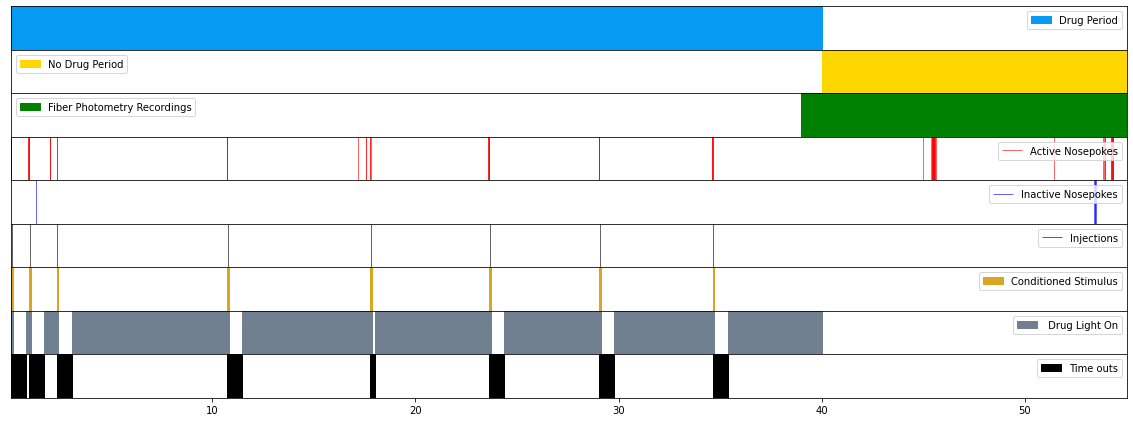

In [5]:
vgbz.rat_sessions['vgb5'].behavior.summary()

### VGB 12

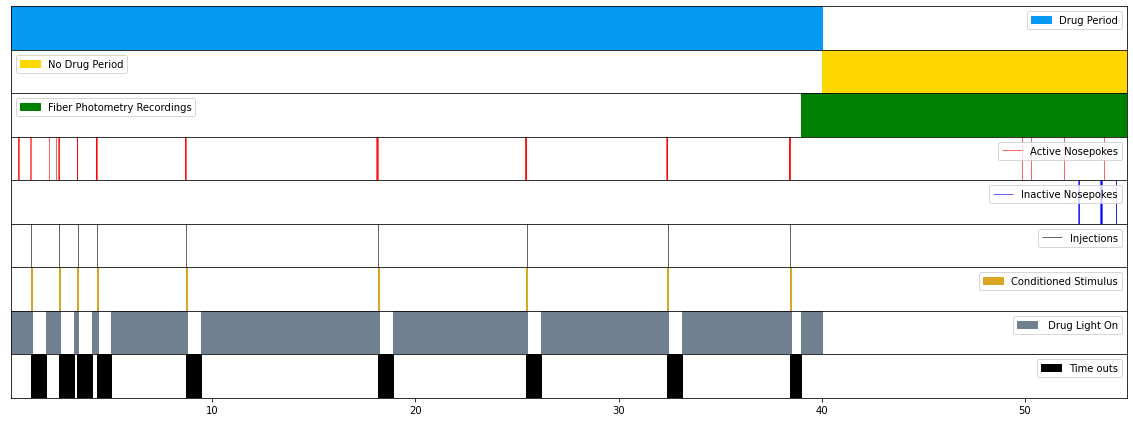

In [6]:
vgbz.rat_sessions['vgb12'].behavior.summary()

## ACTIVE NOSEPOKES

array([[   0,    0,    0, ..., 1839, 1842, 1844],
       [   0,    0,    0, ...,   49,   49,   49],
       [   0,    0,    0, ...,   73,   73,   73]], dtype=int64)

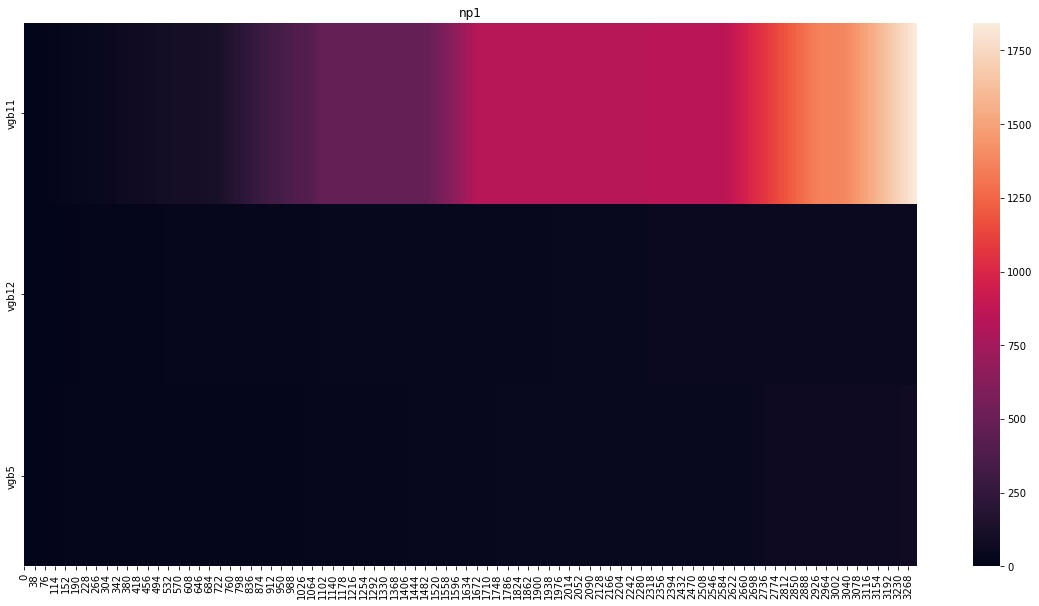

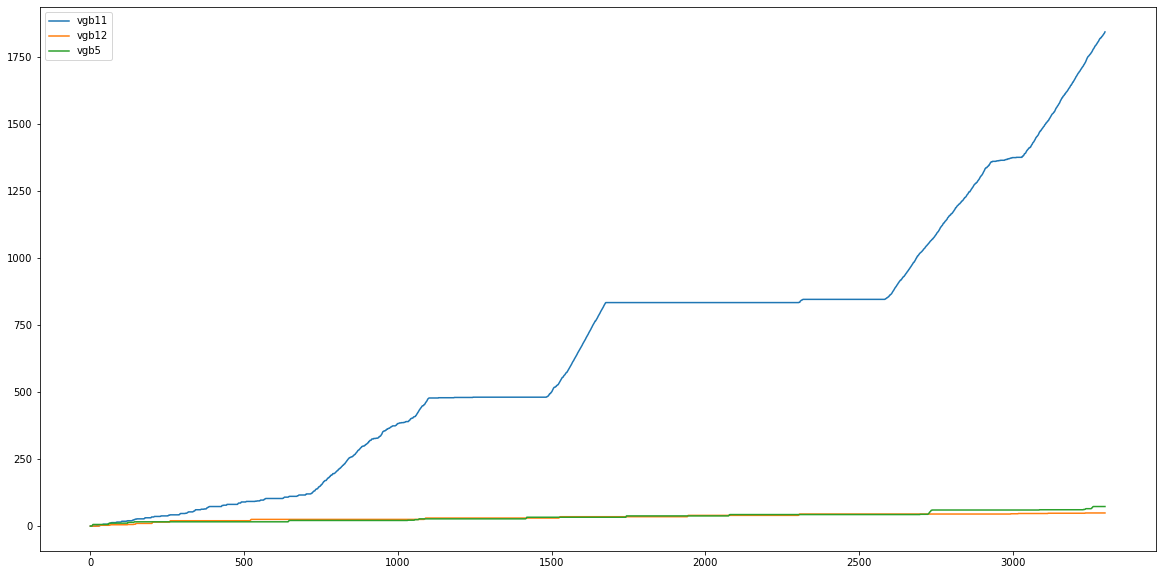

In [7]:
vgbz.compare_behavior('np1')

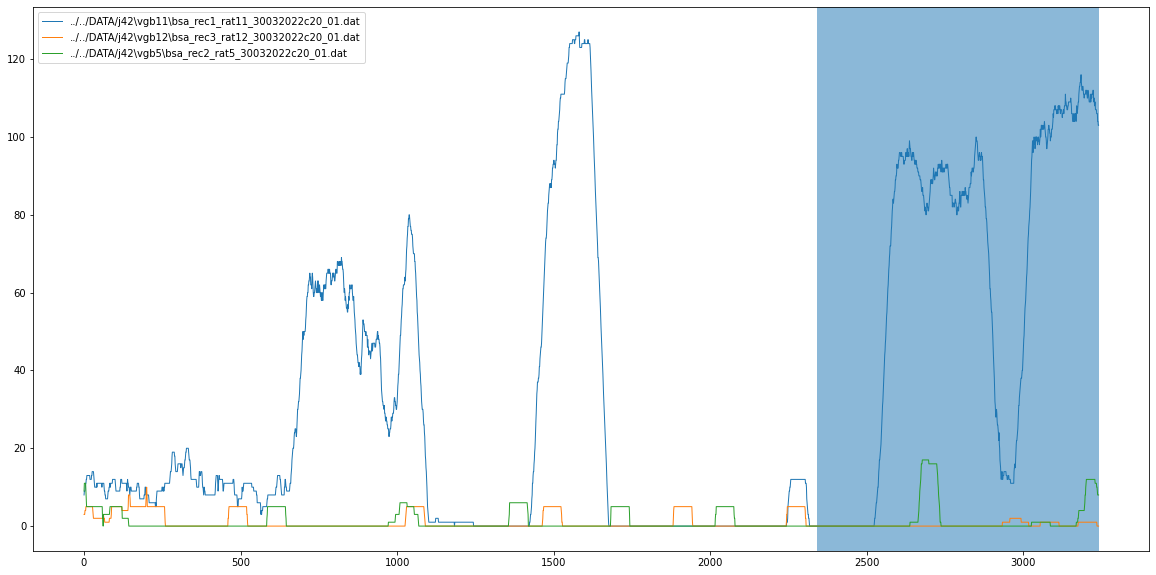

In [8]:
vgbz.multibehavior.show_rate('np1',binsize=60,percentiles=False) # NPA/min

## INACTIVE NOSEPOKES

array([[ 0,  0,  0, ...,  6,  6,  6],
       [ 0,  0,  0, ..., 13, 13, 13],
       [ 0,  0,  0, ...,  5,  5,  5]], dtype=int64)

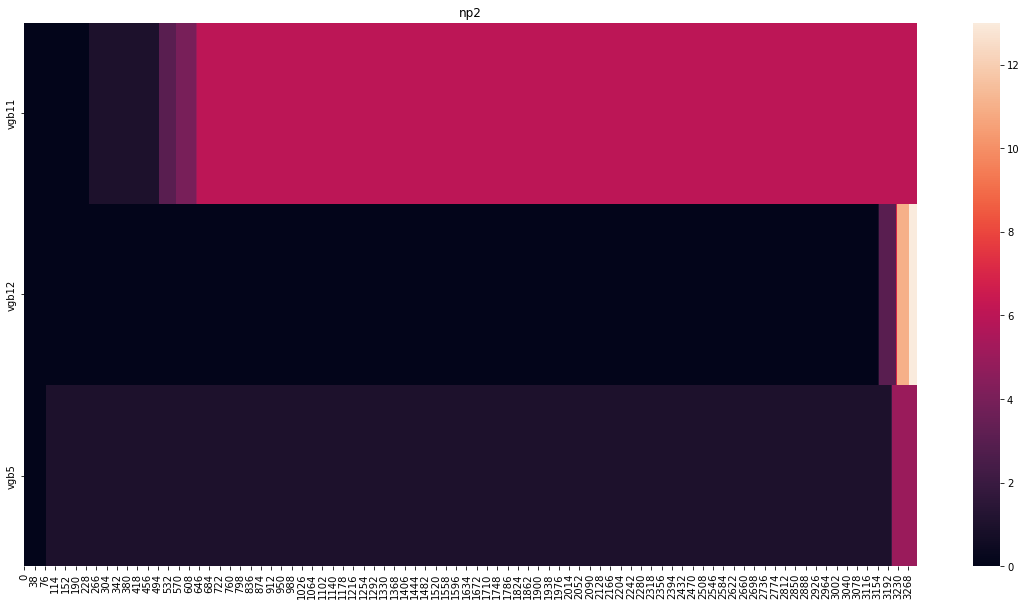

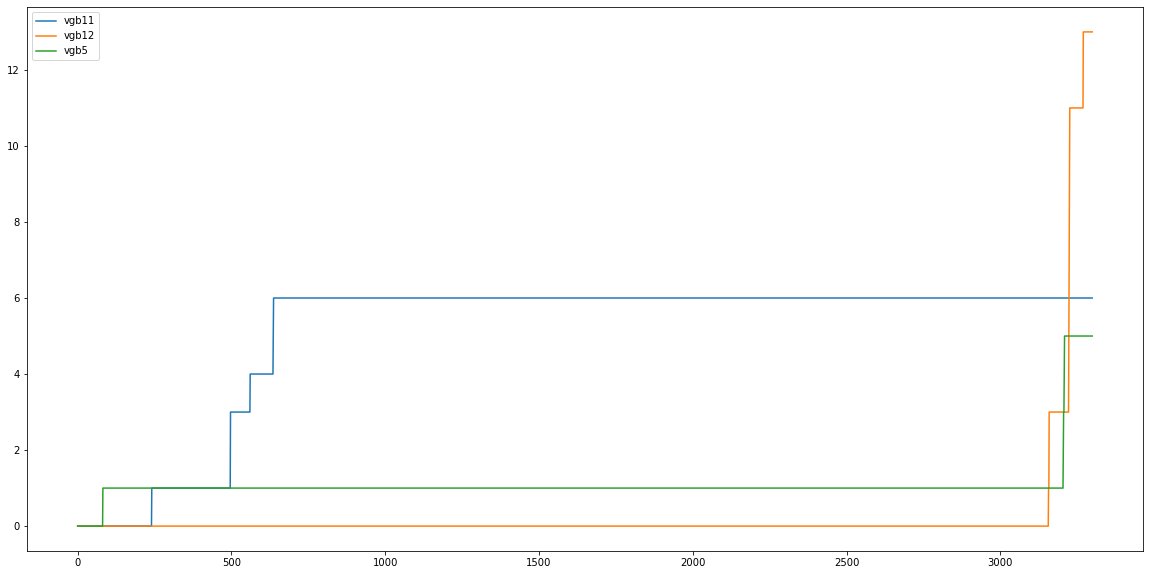

In [9]:
vgbz.compare_behavior('np2')

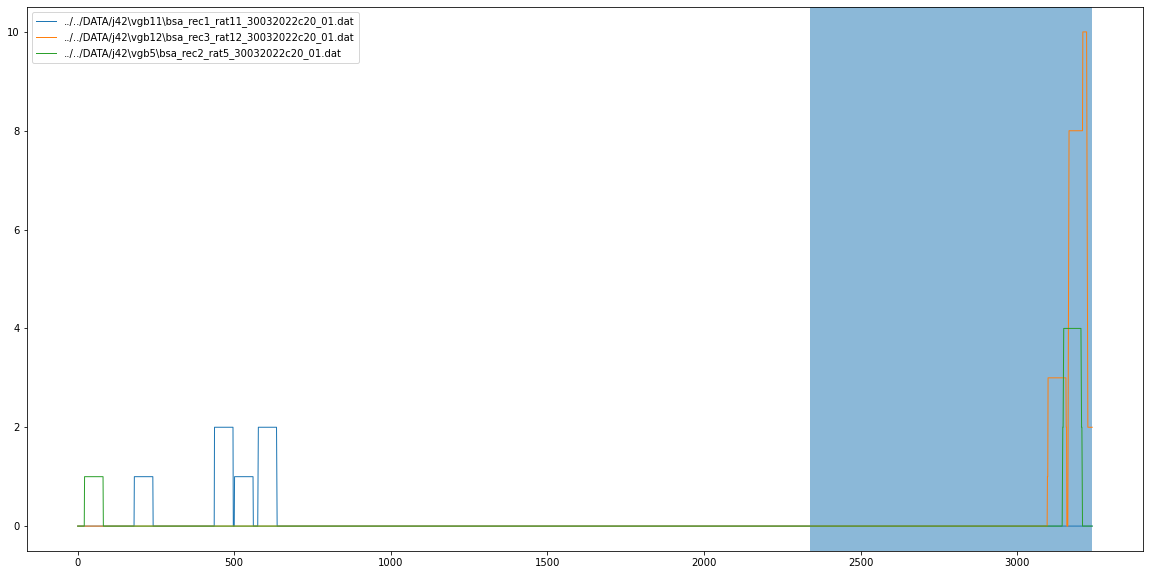

In [10]:
vgbz.multibehavior.show_rate('np2',binsize=60,percentiles=False) # NPB/min

## INJECTIONS

array([[ 0,  0,  0, ..., 26, 26, 26],
       [ 0,  0,  0, ...,  9,  9,  9],
       [ 0,  0,  0, ...,  8,  8,  8]], dtype=int64)

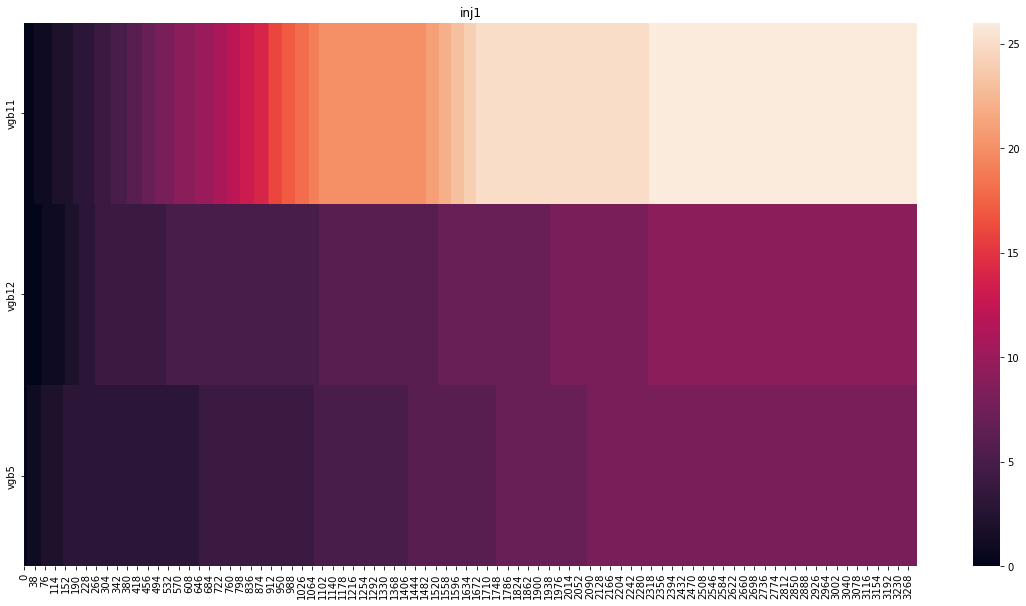

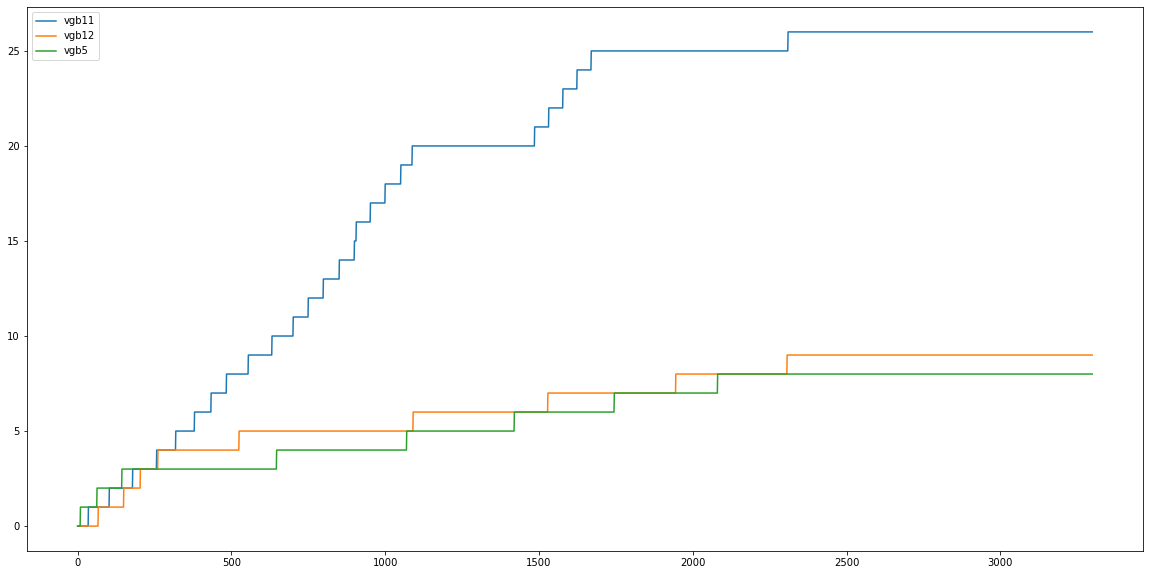

In [11]:
vgbz.compare_behavior('inj1')

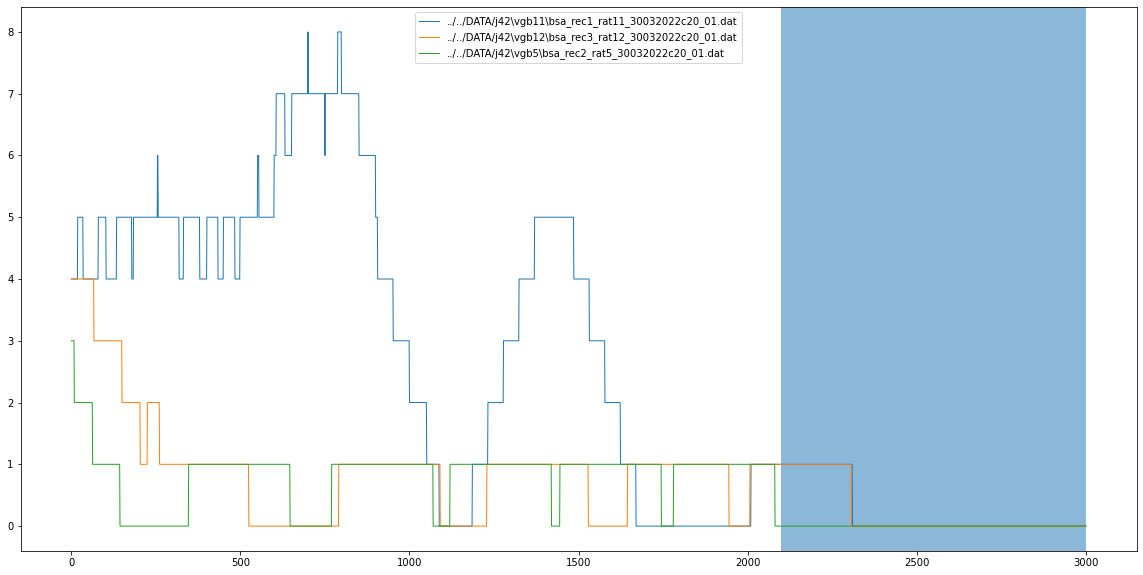

In [12]:
vgbz.multibehavior.show_rate('inj1',binsize=300,percentiles=False) # inj/5min

# PERIEVENT

## SWITCH DRUG TO NO DRUG

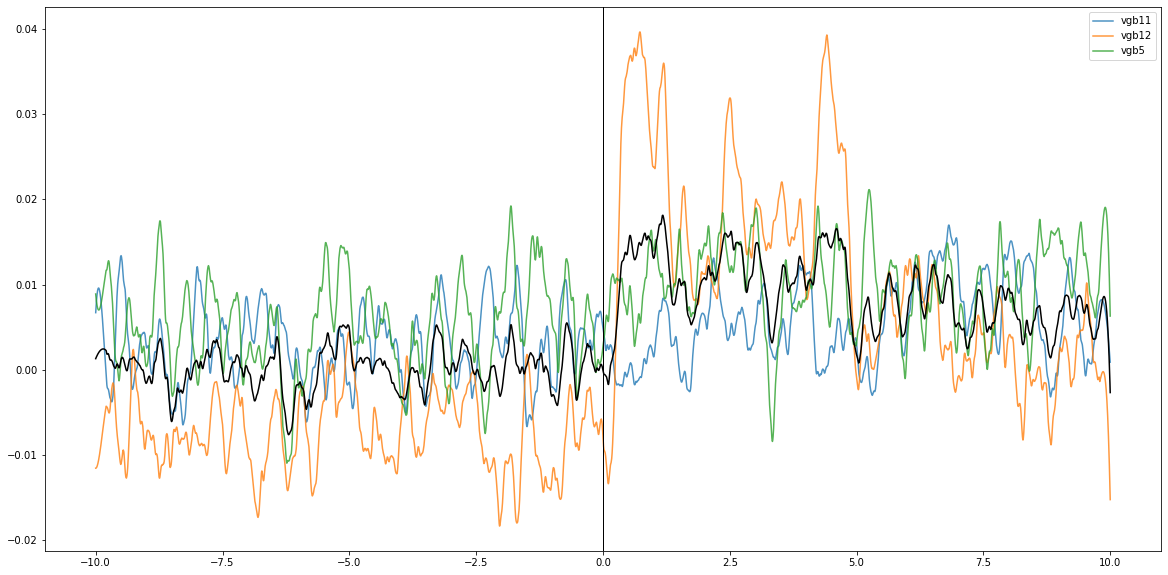

In [13]:
vgbz.analyze("switch_d_nd").plot(alpha=0.8,label=True)

In [14]:
fifo = vgbz.analyze("switch_d_nd")
pd.DataFrame({key: fifo.__dict__[key] for key in ['preAVG_Z', 'postAVG_Z', 'preAVG_RZ', 'postAVG_RZ', 'pre_raw_AUC', 'post_raw_AUC', 'preAUC', 'postAUC', 'preZ_AUC', 'postZ_AUC', 'preRZ_AUC', 'postRZ_AUC']},
index= fifo.__dict__['rat_sessions'])

,preAVG_Z,postAVG_Z,preAVG_RZ,postAVG_RZ,pre_raw_AUC,post_raw_AUC,preAUC,postAUC,preZ_AUC,postZ_AUC,preRZ_AUC,postRZ_AUC
vgb11,7.500987e-17,0.353458,-0.076563,0.497292,1.274294,1.275468,0.028220,0.057435,-0.000387,3.535419,-0.766193,4.974340
vgb12,2.344059e-17,2.177055,-0.114544,3.321798,1.162259,1.183809,-0.072729,0.112398,-0.001124,21.771775,-1.147126,33.219902
vgb5,4.219305e-17,0.492027,0.039277,0.780546,1.104681,1.107032,0.050356,0.099994,0.002466,4.921320,0.396453,7.807048


# PEAKS

In [32]:
goodboys = ['vgb11','vgb5','vgb12']
df = pd.concat([pd.DataFrame({k:pd.Series(v) for k,v in vgbz.rat_sessions[boy].fiber.peakFA(2350,3295).items() if type(v)==float}) for boy in goodboys])
df.index = goodboys
df

,frequency,mean zscore,mean dF/F,max zscore,max dF/F
vgb11,2.451852,1.890057,0.017019,6.200569,0.055831
vgb5,2.283598,1.991221,0.022649,4.597860,0.052296
vgb12,2.051852,1.770930,0.020743,4.575337,0.053591


### VGB11 : all detected peaks

(0.0, 7.0)

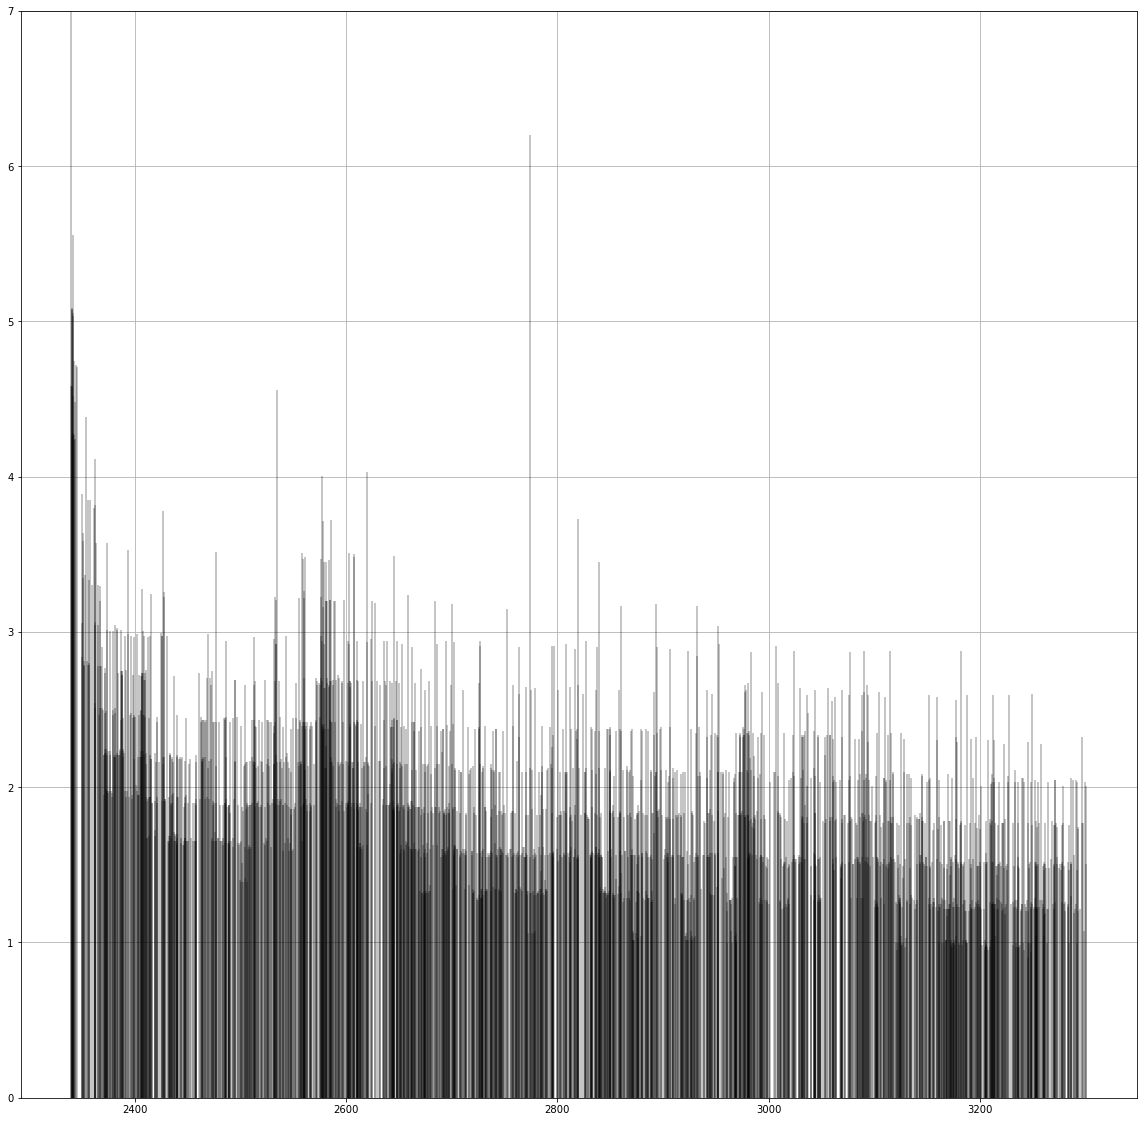

In [19]:
vgbz.rat_sessions['vgb11'].fiber.plot_transients()
plt.ylim((0,7))

### VGB5 : all detected peaks

(0.0, 7.0)

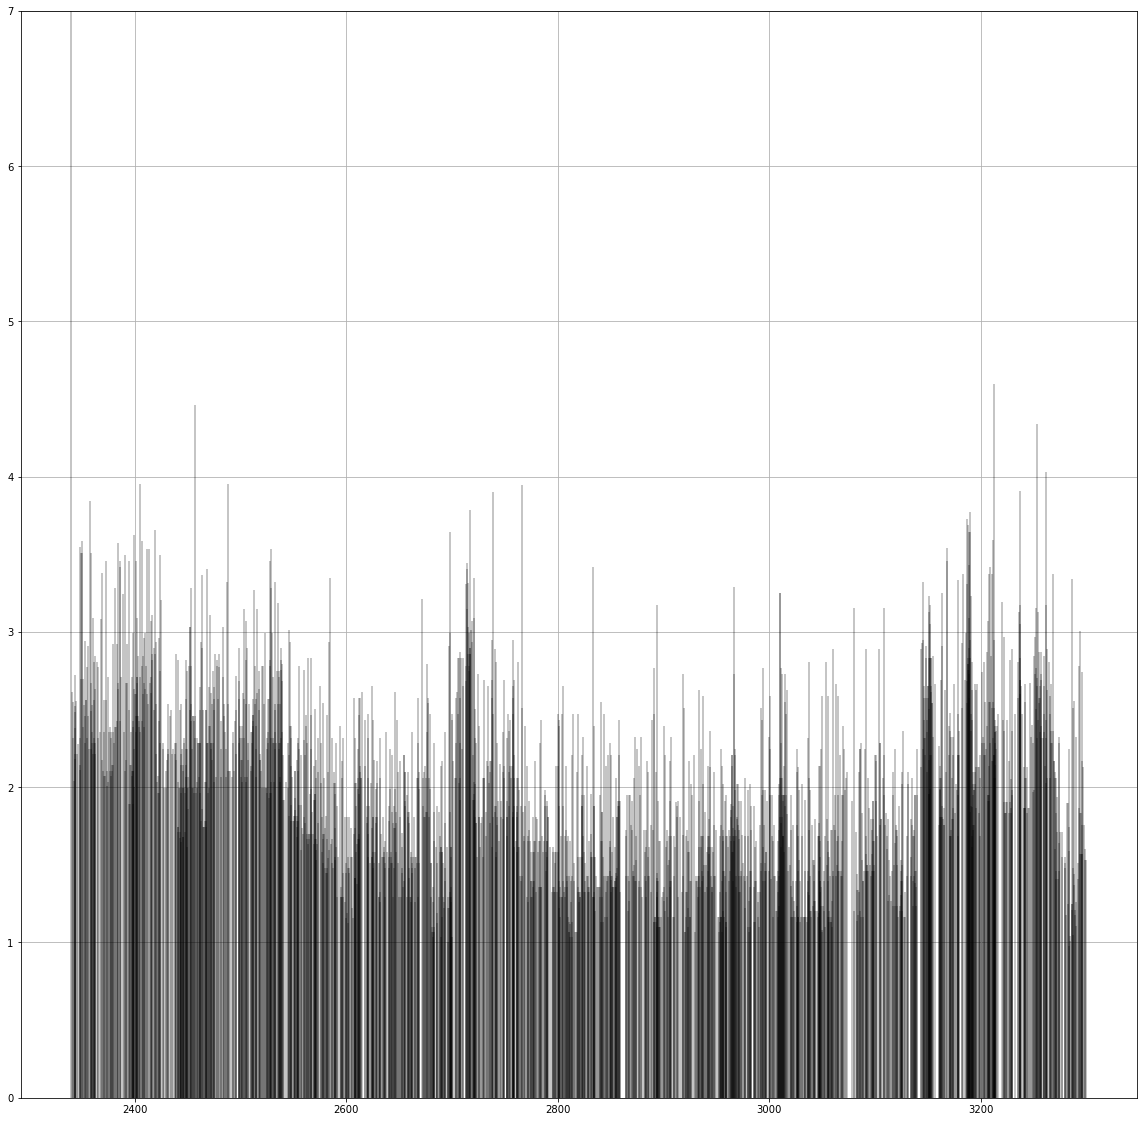

In [34]:
vgbz.rat_sessions['vgb5'].fiber.plot_transients()
plt.ylim((0,7))

### VGB12 : all detected peaks

(0.0, 7.0)

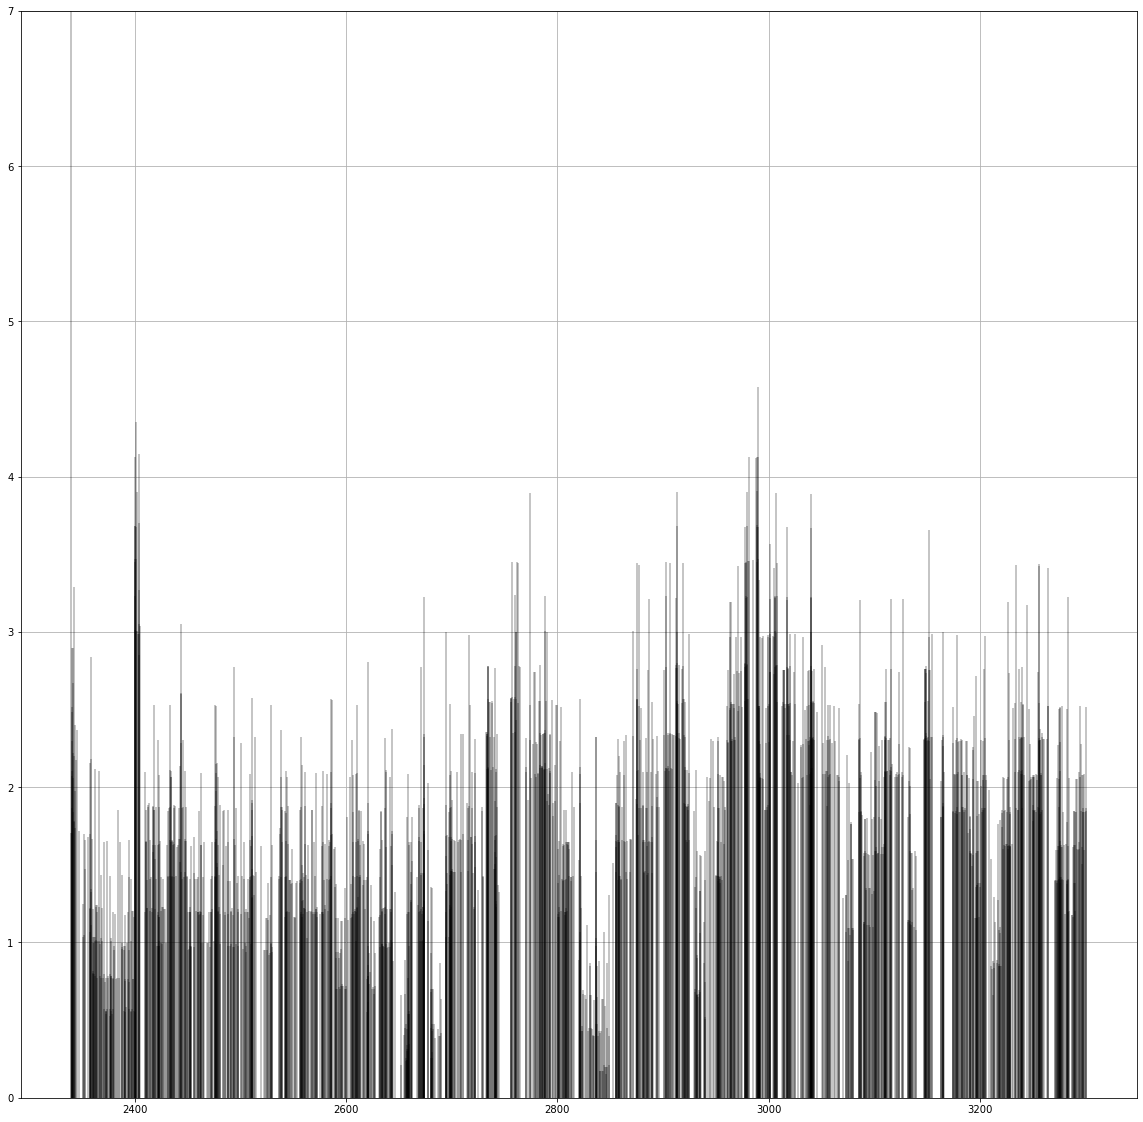

In [35]:
vgbz.rat_sessions['vgb12'].fiber.plot_transients()
plt.ylim((0,7))